In [1]:
#!pip install simple_fpa

In [2]:
# %%capture out
# ! cd ..; pip install . --use-feature=in-tree-build

In [3]:
%%capture out
! cd ..; pip install .

In [4]:
print((out.stdout.split('\n')[-2]))

In [5]:
from simple_fpa import Model, load_haile
import pandas as pd
import numpy as np

import matplotlib as mpl
import matplotlib.pyplot as plt
from pylab import rcParams

rcParams.update({
    "text.usetex": True,
    "font.family": "serif",
    "font.serif": ["Arial"],
    "lines.linewidth": 1,
    "figure.dpi":200
})

In [6]:
data = load_haile()

In [7]:
model = Model(data = data, auctionid_columns = ['auctionid'], bid_column = 'actual_bid')
cont_covs = ['adv_value', 'hhi', 'volume_total_1']
disc_covs = ['year', 'forest']
model.residualize(cont_covs, disc_covs, 'multiplicative')

In [8]:
# we can pick a smaller subset of auctions
model.data = model.data[model.data.auctionid.isin(list(set(model.data.auctionid.values))[:1000])].copy()
# we can pick certain numbers of bidders
model.data = model.data[model.data._bidders.isin([2,3,4,5])].copy()

In [9]:
model.summary()

                            OLS Regression Results                            
Dep. Variable:     np.log(actual_bid)   R-squared:                       0.919
Model:                            OLS   Adj. R-squared:                  0.919
Method:                 Least Squares   F-statistic:                 1.495e+04
Date:                Wed, 01 Jun 2022   Prob (F-statistic):               0.00
Time:                        17:43:27   Log-Likelihood:                -37633.
No. Observations:               60758   AIC:                         7.536e+04
Df Residuals:                   60711   BIC:                         7.578e+04
Df Model:                          46                                         
Covariance Type:            nonrobust                                         
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
Intercept                  2

In [10]:
# we can simulate artificial data, of course
# model.data._resid = np.sort(np.random.uniform(0,1,size = len(model.data)))

In [11]:
model.trim_residuals(10)
model.fit(smoothing_rate = 0.3, trim_percent = 5, boundary = 'reflect')
model.predict()

In [12]:
model.make_ci_asy(95, hyp = 'twosided')

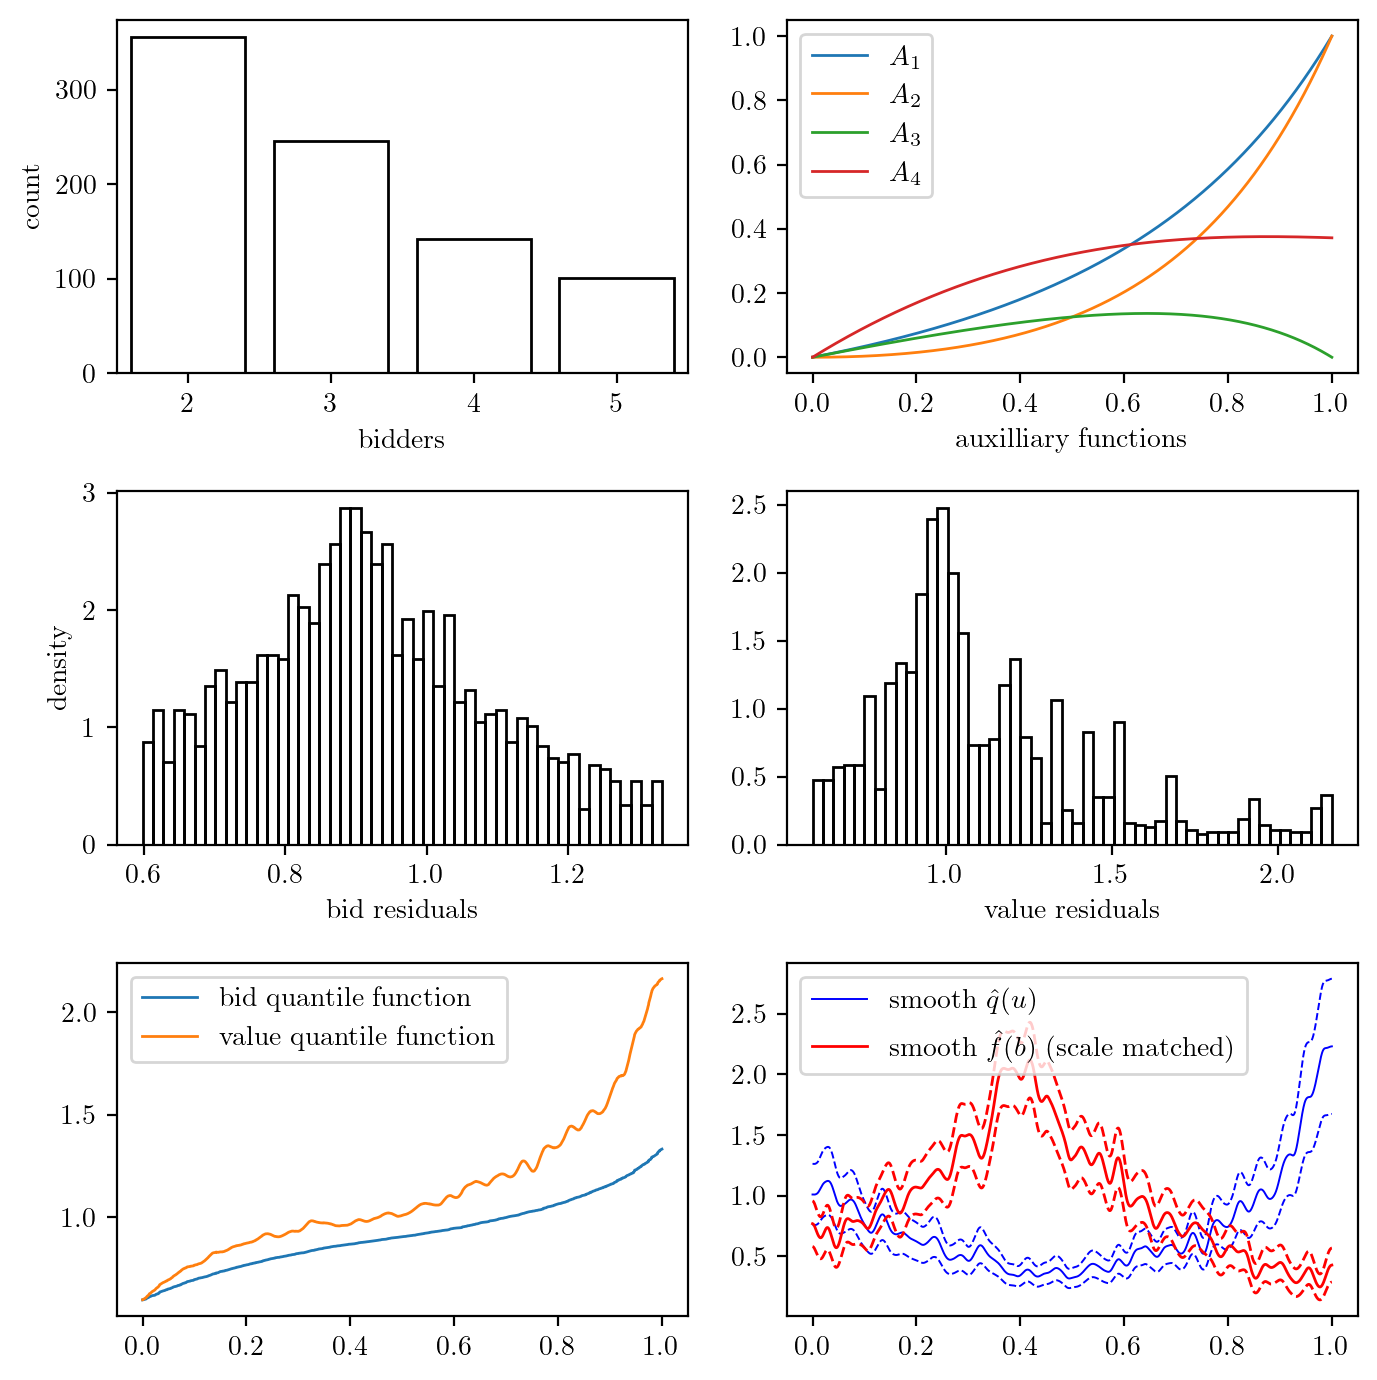

In [13]:
model.plot_stats()

In [14]:
model.make_cicb_other(95, draws = 1000, hyp = 'twosided')

In [15]:
model.find_optimal_u()

optimal exclusion: 0.32391


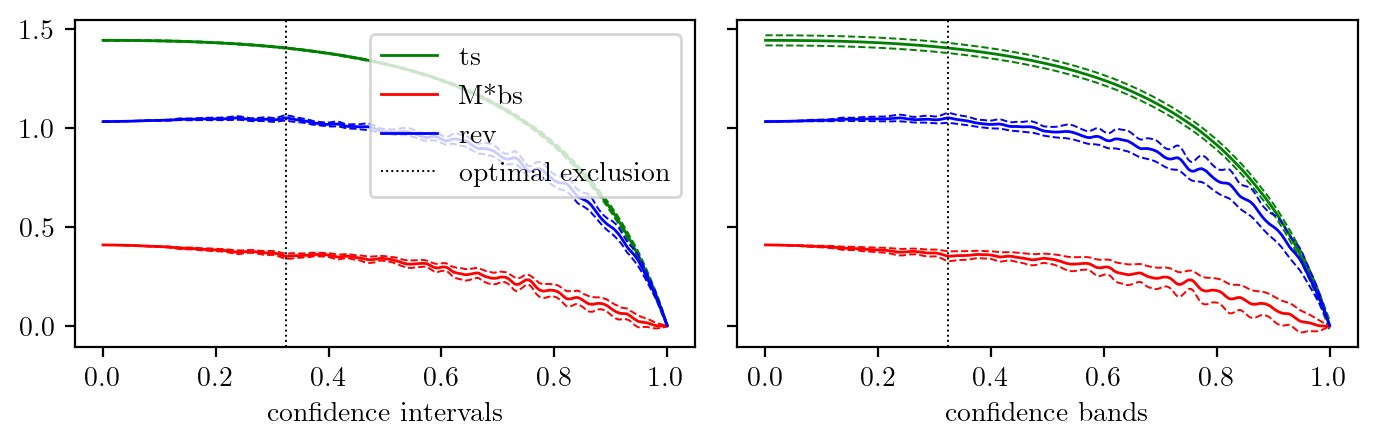

In [16]:
model.plot_counterfactuals()

In [17]:
model.data.sample(5)

,auctionid,hhi,forest,adv_value,year,state,volume_total_1,actual_bid,_bidders,_resid,...,_ts_ci,_ts_cb,_q_ci,_q_cb,_v_ci,_v_cb,_bs_ci,_bs_cb,_rev_ci,_rev_cb
33412,702,0.618842,13,42114162.0,82,48,2560.0,44393535.0,5,0.935548,...,0.003757,0.025568,0.103071,0.201473,0.035349,0.069096,0.001940,0.003792,0.017462,0.034132
962,962,0.374530,24,2024715.0,82,26,231.0,2594571.0,5,1.132778,...,0.013589,0.025568,0.260465,0.509321,0.097826,0.191292,0.003636,0.007111,0.032728,0.063998
16676,207,0.438987,18,1277900.0,82,6,1367.0,9225885.0,4,2.715911,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
14,14,0.452556,4,266530.0,82,16,455.0,1639732.0,3,2.394039,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
554,554,0.533553,9,9794753.0,82,5,661.0,10484767.0,4,0.883685,...,0.002848,0.025568,0.086375,0.174180,0.025897,0.052222,0.001232,0.002483,0.011084,0.022351
